In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
log_paths = [
    'saves/230414_1808/logs/Fri_14_Apr_2023_22_14_39-l-10-m-7-x-6000.log',
    'saves/230414_1825/logs/Fri_14_Apr_2023_22_26_54-l-10-m-7-x-6000.log',
    'saves/230414_2035/logs/Sat_15_Apr_2023_00_42_58-l-10-m-7-x-6000.log',
    'saves/230414_2040/logs/Sat_15_Apr_2023_00_50_44-l-10-m-7-x-6000.log',
    'saves/230414_2141/logs/Sat_15_Apr_2023_01_41_06-l-10-m-7-x-6000.log']

In [88]:
# Read the log file into a list of strings
def analyze_logs(filename):

    with open(filename, 'r') as f:
        log_lines = f.readlines()

    # Extract the relevant information from the log lines
    data = []
    for line in log_lines:
        if not line.startswith('#'):
            continue
        line = line[1:]  # Remove '#' at the beginning
        fields = line.split('|')
        entry = {
            'steps': int(fields[1].strip().split(':')[-1]),
            'steps_t': int(fields[2].strip().split(':')[-1]),
            't': float(fields[3].strip().split(':')[-1]),
            'r': float(fields[4].strip().split(':')[-1]),
            'e': float(fields[5].strip().split(':')[-1]),
            'Q': float(fields[6].strip().split(':')[-1]),
            'won': fields[7].strip().split(':')[-1].lower().strip() == 'true',
        }
        data.append(entry)


    # Create a Pandas DataFrame from the extracted data
    df = pd.DataFrame(data)
    df = df.dropna()
    df['steps_diff'] = df['steps'].diff()

    rolling_q_score = df['Q'].rolling(window=100).mean()
    rolling_r_score = df['r'].rolling(window=100).mean()
    rolling_won_rate = (df['won'].astype(int)).rolling(window=100).mean()
    rolling_steps = df['steps_diff'].rolling(window=100).mean()


    # Create a figure with 3 subplots, sharing the x-axis
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(8, 10))

    # Plot index vs rolling q score on the first subplot
    ax1.plot(df.index, rolling_q_score, label='Rolling q Score (window=100)')
    ax1.set_ylabel('q Score')
    ax1.legend()

    # Plot index vs rolling r score on the second subplot
    ax2.plot(df.index, rolling_r_score, label='Rolling r Score (window=100)')
    ax2.set_ylabel('r Score')
    ax2.legend()

    # Plot index vs rolling won rate on the third subplot
    ax3.plot(df.index, rolling_won_rate, label='Rolling Win Rate (window=100)')
    ax3.set_xlabel('Index')
    ax3.set_ylabel('Win Rate')
    ax3.legend()

    # Plot index vs rolling steps diff on the fourth subplot
    ax4.plot(df.index, rolling_steps, label='Rolling Steps (window=100)')
    ax4.set_xlabel('Index')
    ax4.set_ylabel('Steps')
    ax4.legend()

    # Add a title for the entire figure
    fig.suptitle('Rolling q Score, Rolling r Score, Rolling Win Rate, and Rolling Steps (window=100)')

    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.3)

    # Show the plot
    plt.show()

    # print(df)

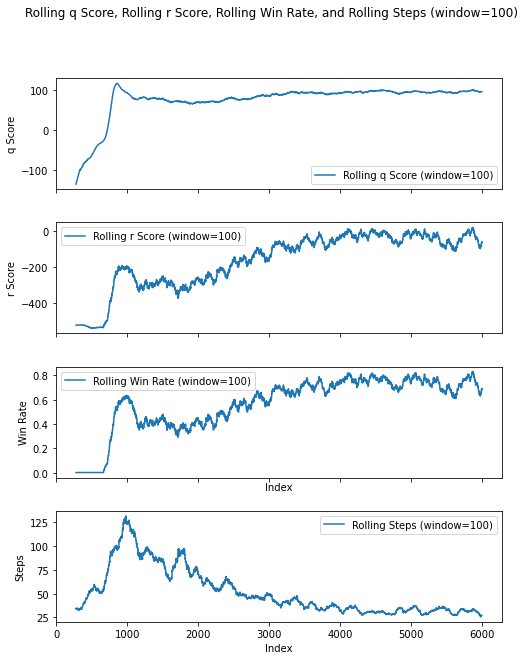

In [89]:
analyze_logs(log_paths[0])  # random ghosts

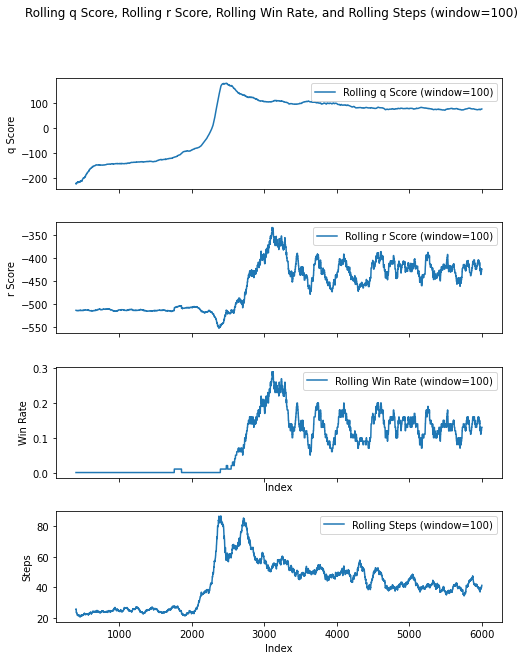

In [90]:
analyze_logs(log_paths[1])  # ghosts with attack = 0.6

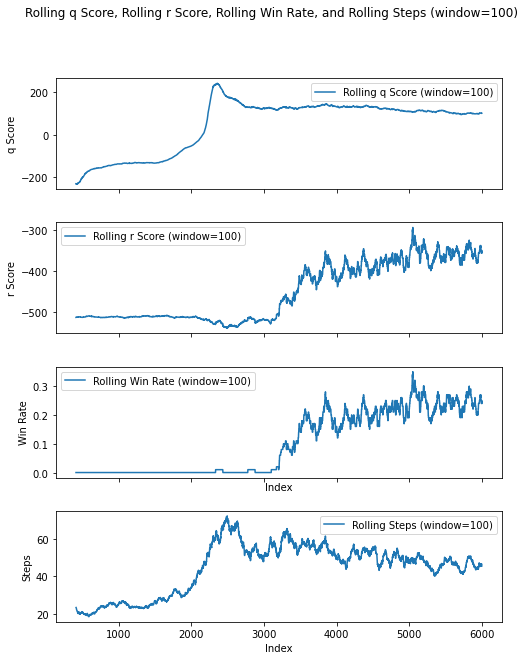

In [91]:
analyze_logs(log_paths[2])  # ghosts with attack = 0.7

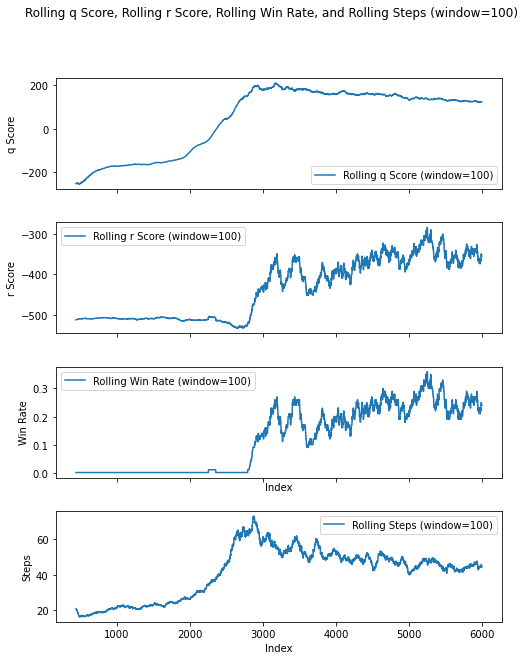

In [94]:
analyze_logs(log_paths[4])  # ghosts with attack = 0.8

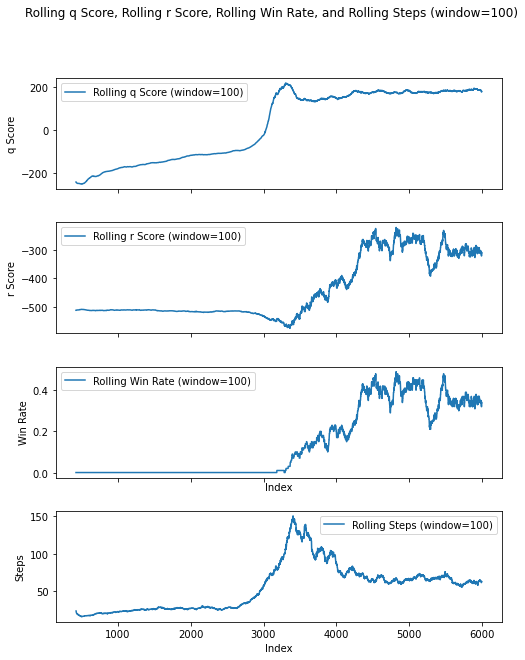

In [92]:
analyze_logs(log_paths[3])  # ghosts with attack = 0.7, lr=1e-4

In [106]:
import glob
directory_path = "./logs"

# Use glob to get all files with .log extension in the directory
log_files = sorted(glob.glob(directory_path + "/*.log"))

# Print the list of log files
print(log_files)

['./logs/Fri_14_Apr_2023_22_20_11-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_21_17-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_21_39-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_22_08-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_22_27-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_24_35-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_27_08-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_27_37-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_27_57-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_28_23-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_29_58-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_31_00-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_31_18-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_31_37-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_31_58-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_34_47-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_35_49-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_36_12-l-10-m-7-x-1.log', './logs/Fri_14_Apr_2023_22_36_24-l-10-m-7-x-1.log', './logs/Fri

In [114]:
results = []
model_results = []

# Iterate through each log file
for i, log_file in enumerate(log_files):
    total_games = 0
    total_wins = 0
    with open(log_file, 'r') as file:
        # Read the file line by line
        for line in file:

            # print(line)
            # Check if the line contains "won: True" or "won: False"
            if "won: True" in line:
                total_games += 1
                total_wins += 1
                # print(total_wins)
            elif "won: False" in line:
                total_games += 1

    # Print the win rate for the current file
    win_rate = total_wins / total_games if total_games > 0 else 0
    # print(total_games)
    model_results.append(win_rate)
    print(f"{win_rate:.2%}", end=", ")

    # Print a line break after every 5th file
    if (i + 1) % 5 == 0:
        results.append(model_results)
        model_results = []
        print("\n")

print(results)
# Print the overall win rate
# overall_win_rate = total_wins / total_games if total_games > 0 else 0
# print(f"\nOverall Win Rate: {overall_win_rate:.2%}")

70.00%, 38.00%, 40.00%, 28.00%, 38.00%, 

16.00%, 4.00%, 8.00%, 10.00%, 2.00%, 

48.00%, 20.00%, 16.00%, 18.00%, 8.00%, 

40.00%, 16.00%, 8.00%, 4.00%, 2.00%, 

[[0.7, 0.38, 0.4, 0.28, 0.38], [0.16, 0.04, 0.08, 0.1, 0.02], [0.48, 0.2, 0.16, 0.18, 0.08], [0.4, 0.16, 0.08, 0.04, 0.02]]


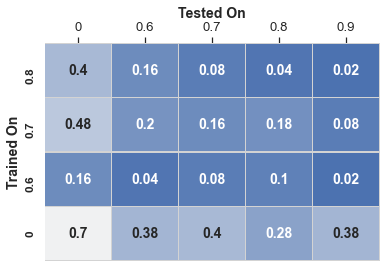

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mock data for the 2D array (replace with your actual data)

# Create a list of custom labels for the x-axis and y-axis
x_labels = [0, 0.6, 0.7, 0.8, 0.9]
y_labels = [0, 0.6, 0.7, 0.8]

# Convert the 2D array to a list of lists for heatmap plotting
data = [list(row) for row in results]

# Create a seaborn heatmap with custom labels
sns.set(font_scale=1.2) # Set font scale for larger labels
cmap = sns.color_palette("light:b_r", as_cmap=True) # Define color map
ax = sns.heatmap(data, annot=True, cmap=cmap, cbar=False, xticklabels=x_labels, yticklabels=y_labels, linewidths=0.5, linecolor='lightgray', annot_kws={"size": 14, "weight": "bold"})
ax.set_xlabel("Tested On", fontsize=14, fontweight='bold') # Set x-axis label
ax.set_ylabel("Trained On", fontsize=14, fontweight='bold') # Set y-axis label
ax.invert_yaxis() # Reverse y-axis
plt.xticks(fontsize=12, fontweight='bold') # Set x-axis tick labels font size and weight
plt.yticks(fontsize=12, fontweight='bold') # Set y-axis tick labels font size and weight
ax.xaxis.tick_top() # Move x-axis ticks to top
ax.xaxis.set_label_position('top') # Move x-axis label to top
ax.set_facecolor('lightgray') # Set background color of the plot
plt.grid(color='white', linewidth=0.5) # Set grid line color to lighter gray

# Show the plot
plt.show()
